# Erlazio erauzlea

Erlazio erauzlearen funtzionamenduaren adibide bat.

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from erlazio_erauzlea import ErlazioErauzlea

In [18]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', -1)

## Entrenatu modeloa

In [25]:
path_to_data = '../../../c/Users/osain/Desktop/QG/FITXATEGIAK/'
os.listdir(path_to_data)

['corpus',
 'corpusa_nil_oso_txikia_iragazita_pmi_1.5.tsv',
 'dataset',
 'izen_lexikografikoak.tsv',
 'terminoak.npy']

In [26]:
# Jaso beharrezko datuak entrenatzeko
terminoak = np.load(path_to_data+'terminoak.npy')
tokens = pd.read_csv(path_to_data+'corpus/tokens.tsv.bz2', sep='\t', compression='bz2', index_col=0, encoding='latin-1')
lemmas = pd.read_csv(path_to_data+'corpus/lemmas.tsv.bz2', sep='\t', compression='bz2', index_col=0, encoding='latin-1')
pos = pd.read_csv(path_to_data+'corpus/pos.tsv.bz2', sep='\t', compression='bz2', index_col=0, encoding='latin-1')
izen_lexikografikoak = pd.read_csv(path_to_data+'izen_lexikografikoak.tsv', sep='\t')
izen_lexikografikoak = izen_lexikografikoak.set_index('word').T.to_dict('list')

train, dev = pd.read_csv(path_to_data+'dataset/train.tsv', sep='\t'), pd.read_csv(path_to_data+'dataset/dev.tsv', sep='\t')

In [27]:
ee = ErlazioErauzlea(terminoak)
ee.egokitu(train, dev, tokens, lemmas, pos=pos, izen_lexikografikoak=izen_lexikografikoak, argumentuen_arteko_distantzia=20)

Ezaugarriak erauzten...erauzita! 71178 ezaugarri.
Laginketa aplikatzen...Ondo!
Hiperparametroak optimizatzen...Ondo! C=0.0031827662094168914.
Sailkatzailea egokituta:
Doitasuna:0.4955362829666055, Estaldura:0.548856743894947, F1-Neurria:0.5126339873863671


In [28]:
ee.gorde('modeloa20.ee')

## Probatu erlazio-erauzlea

In [19]:
if 'ee' not in locals():
    ee = ErlazioErauzlea.kargatu_bertsio_zahar_batetik('modeloa20.ee')

In [29]:
esaldia = "Cells consist of cytoplasm enclosed within a membrane. Organisms can be classified as unicellular (consisting of a single cell; including bacteria) or multicellular (including plants and animals)."

In [31]:
erlazioak= ee.erlazioak_erauzi(esaldia)
erlazioak

,arg1,arg2,rel,tokens
0,cell,cytoplasm,PartOf,cells consist of cytoplasm enclosed within a membrane .
1,cell,membrane,AtLocation,cells consist of cytoplasm enclosed within a membrane .
2,cytoplasm,cell,PartOf,cells consist of cytoplasm enclosed within a membrane .
3,cytoplasm,membrane,AtLocation,cells consist of cytoplasm enclosed within a membrane .
4,membrane,cell,AtLocation,cells consist of cytoplasm enclosed within a membrane .
5,membrane,cytoplasm,AtLocation,cells consist of cytoplasm enclosed within a membrane .
6,organism,can,Nil,organisms can be classified as unicellular ( consisting of a single cell ; including bacteria ) or multicellular ( including plants and animals ) .
7,organism,unicellular,IsA,organisms can be classified as unicellular ( consisting of a single cell ; including bacteria ) or multicellular ( including plants and animals ) .
8,organism,cell,PartOf,organisms can be classified as unicellular ( consisting of a single cell ; including bacteria ) or multicellular ( including plants and animals ) .
9,organism,bacteria,IsA,organisms can be classified as unicellular ( consisting of a single cell ; including bacteria ) or multicellular ( including plants and animals ) .


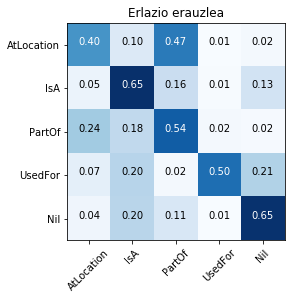

In [34]:
ee.ebaluatzailea.konfusio_matrizea('Erlazio erauzlea')

Average precision score, micro-averaged over all classes: 0.53


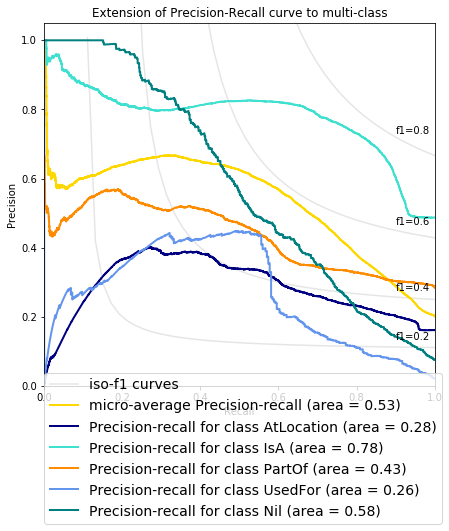

In [36]:
_, _, _ = ee.ebaluatzailea.precision_recall_kurba()